In [195]:
import pandas as pd
import os
%matplotlib inline

### Extract Data from CSV file


In [196]:
VACANCIES_CSV_PATH = os.path.join("..", "web_scrapping", "vacancies.csv")
vacancies = pd.read_csv(VACANCIES_CSV_PATH)

In [197]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   230 non-null    object
 1   Location                230 non-null    object
 2   Description             230 non-null    object
 3   Additional Information  230 non-null    object
 4   Views                   230 non-null    int64 
 5   Applications            230 non-null    int64 
 6   Filtered Technologies   230 non-null    object
dtypes: int64(2), object(5)
memory usage: 12.7+ KB


In [198]:
vacancies.describe()

,Views,Applications
count,230.000000,230.00000
mean,114.656522,26.10000
std,142.001474,40.45466
min,1.000000,0.00000
25%,37.000000,5.00000
50%,69.500000,13.50000
75%,137.500000,34.00000
max,1211.000000,452.00000


### Aggregating a comprehensive list of technologies listed across all vacancies and subsequently identifying the top 20 most frequently mentioned technologies.

In [199]:
from collections import Counter

all_technologies = []
for tech_list in vacancies["Filtered Technologies"]:
    tech_list = eval(tech_list)
    all_technologies.extend(tech_list)


technology_counts = Counter(all_technologies)
top_technologies = technology_counts.most_common(20)
top_technologies_df = pd.DataFrame(top_technologies, columns=['Technology', 'Count'])
top_technologies_df

,Technology,Count
0,PYTHON,186
1,AWS,61
2,REST,52
3,DOCKER,52
4,DJANGO,51
5,SQL,42
6,APIS,33
7,POSTGRESQL,32
8,FLASK,29
9,GIT,29


### Top 20 most common technologies diagram

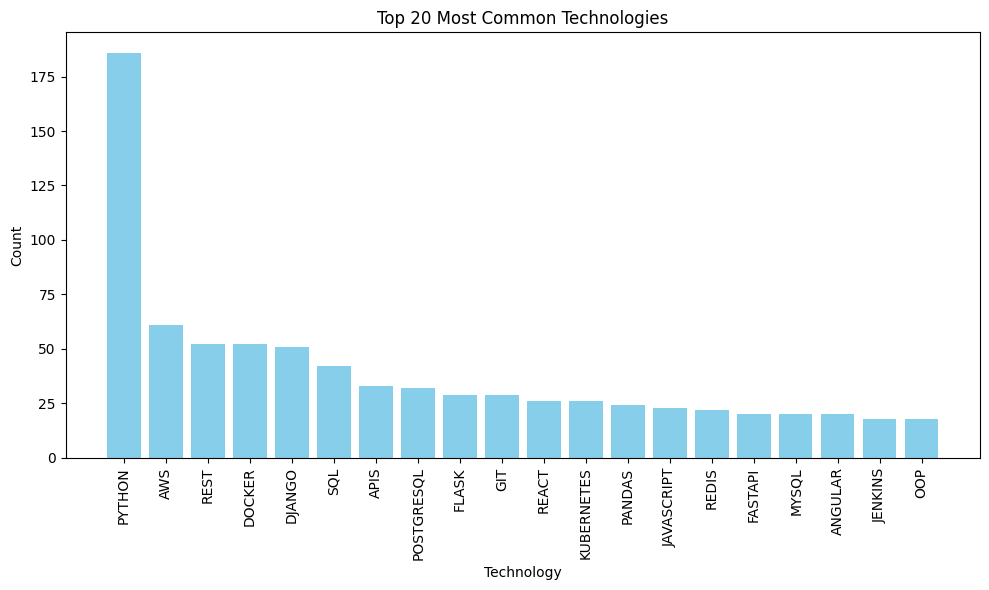

In [200]:
import matplotlib.pyplot as plt
technologies = [tech[0] for tech in top_technologies]
counts = [tech[1] for tech in top_technologies]

plt.figure(figsize=(10, 6))
plt.bar(technologies, counts, color='skyblue')
plt.xticks(rotation='vertical')
plt.xlabel('Technology')
plt.ylabel('Count')
plt.title('Top 20 Most Common Technologies')

plt.tight_layout()

### Analysis of most popular technologies for Junior Vacancy

In [201]:
junior_vacancies_df = vacancies[vacancies["Title"].str.contains(r'\bJunior\b', case=False, regex=True)]
all_technologies = []
for tech_list in junior_vacancies_df["Filtered Technologies"]:
    tech_list = eval(tech_list)
    all_technologies.extend(tech_list)

junior_technology_counts = Counter(all_technologies)
top_junior_technologies = junior_technology_counts.most_common()
top_junior_technologies_df = pd.DataFrame(top_junior_technologies, columns=['Technology', 'Count'])
top_junior_technologies_df

,Technology,Count
0,PYTHON,9
1,SQL,4
2,DJANGO,4
3,JAVASCRIPT,3
4,MYSQL,3
5,FLASK,2
6,GITHUB,2
7,GIT,2
8,REDIS,1
9,TENSORFLOW,1


### Most popular Junior technologies diagram

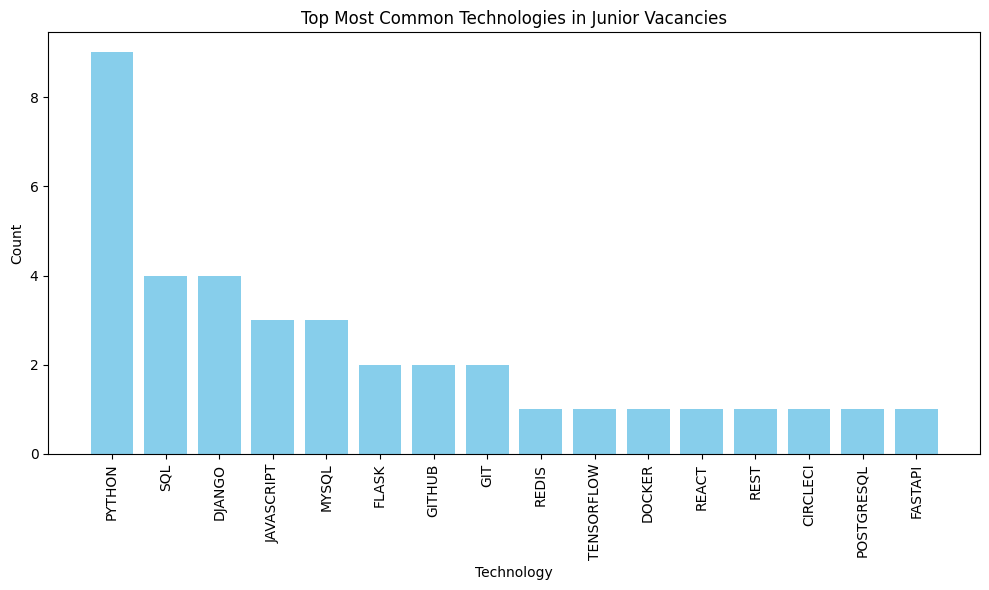

In [202]:
plt.figure(figsize=(10, 6))
plt.bar(top_junior_technologies_df['Technology'], top_junior_technologies_df['Count'], color='skyblue')
plt.xticks(rotation='vertical')
plt.xlabel('Technology')
plt.ylabel('Count')
plt.title('Top Most Common Technologies in Junior Vacancies')
plt.tight_layout()

#### Junior vacancies views and applications diagram

<Figure size 1200x800 with 0 Axes>

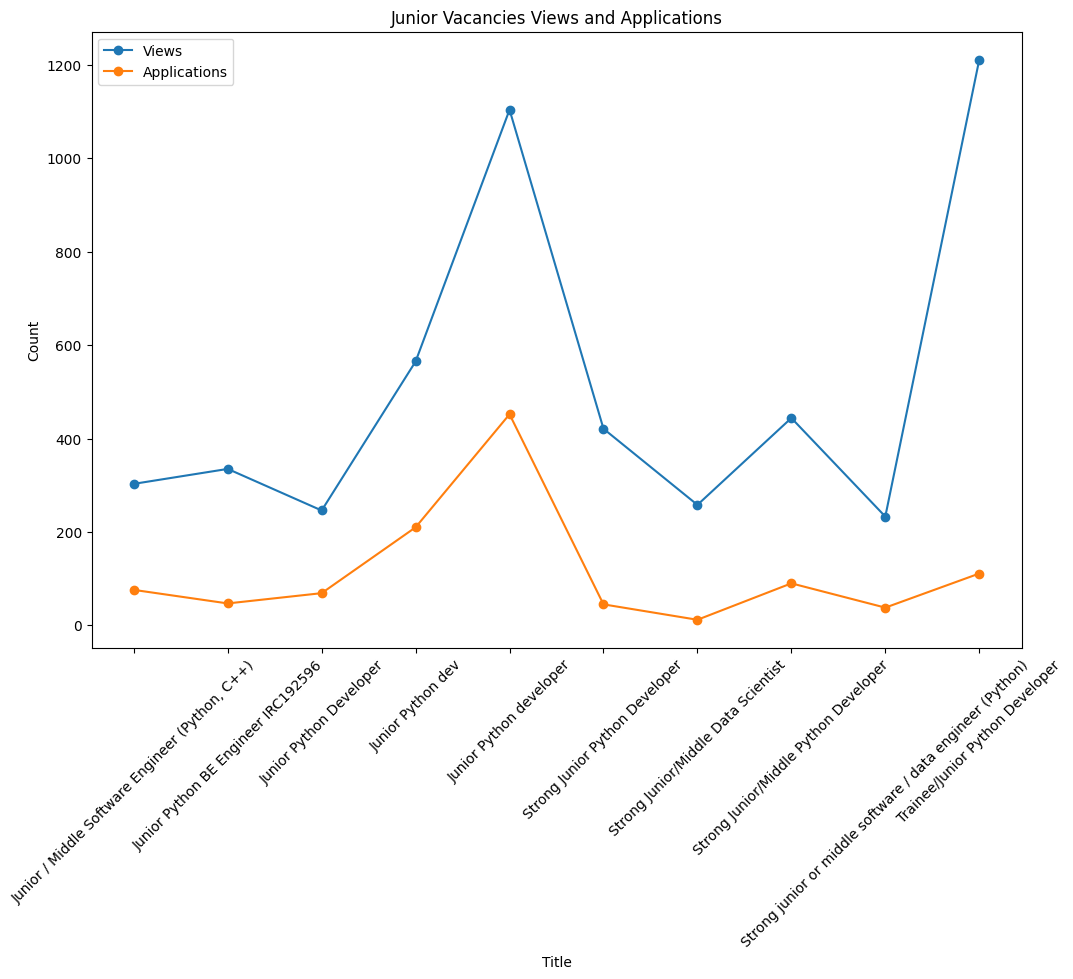

In [203]:
grouped = junior_vacancies_df.groupby("Title").agg({"Views": "sum", "Applications": "sum"})

plt.figure(figsize=(12, 8))

plt.figure(figsize=(12, 8))

plt.plot(grouped.index, grouped['Views'], marker='o', label='Views')
plt.plot(grouped.index, grouped['Applications'], marker='o', label='Applications')

plt.title('Junior Vacancies Views and Applications')
plt.xlabel('Title')
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(False)
plt.show()

### Extracting Unique Locations and Calculating Percentages

In [204]:
all_locations = []
for location_list in vacancies["Location"]:
    location_list = eval(location_list)
    all_locations.extend(location_list)

total_locations = len(all_locations)

location_counts = Counter(all_locations)
location_counts_df = pd.DataFrame.from_dict(location_counts, orient="index", columns=["Count"])
location_counts_df.index.name = "Location"
location_counts_df["Percentage"] = (location_counts_df["Count"] / total_locations * 100)
location_counts_df

,Count,Percentage
Location,,
Ukraine,193,44.470046
Lviv,30,6.912442
Israel,6,1.382488
Relocate,18,4.147465
Kyiv,58,13.364055
Dnipro,7,1.612903
Ivano,1,0.230415
Frankivsk,1,0.230415
2,1,0.230415


### Diagram of most popular locations

(-1.0999997580785663,
 1.0999999880061069,
 -1.0999996092060258,
 1.099999969917661)

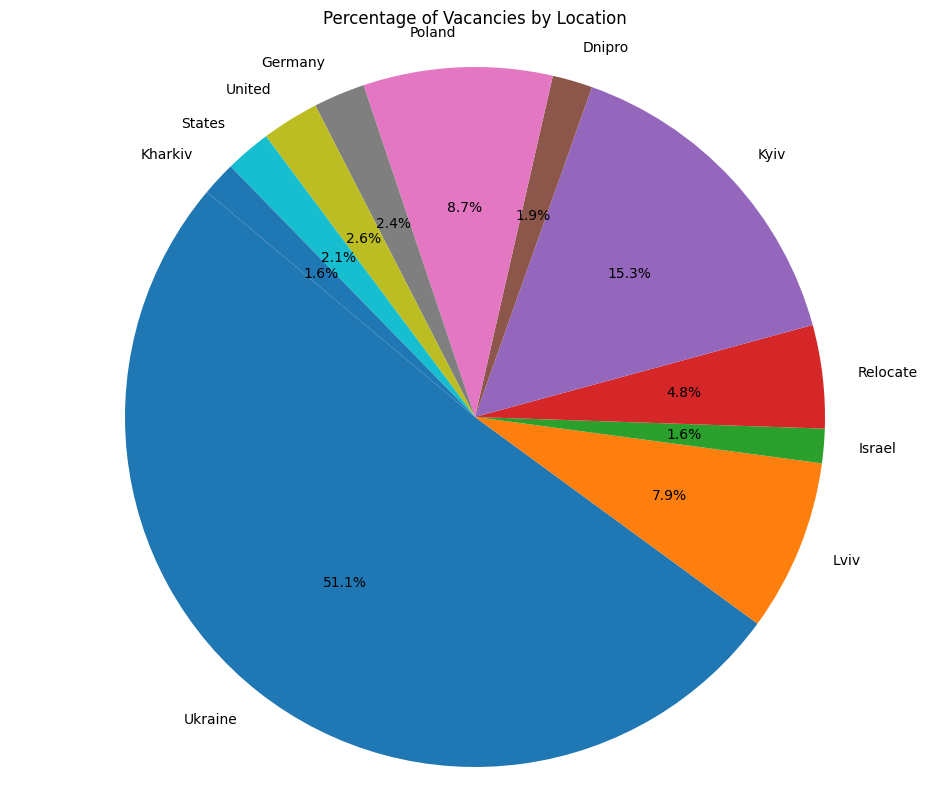

In [205]:
filtered_locations_df = location_counts_df[location_counts_df["Percentage"] > 1]

plt.figure(figsize=(12, 10))
plt.pie(filtered_locations_df["Percentage"], labels=filtered_locations_df.index, autopct='%.1f%%', startangle=140)
plt.title('Percentage of Vacancies by Location')
plt.axis('equal')

### In this analysis, we will examine the distribution of job vacancies that offer the option to work remotely or at the office.

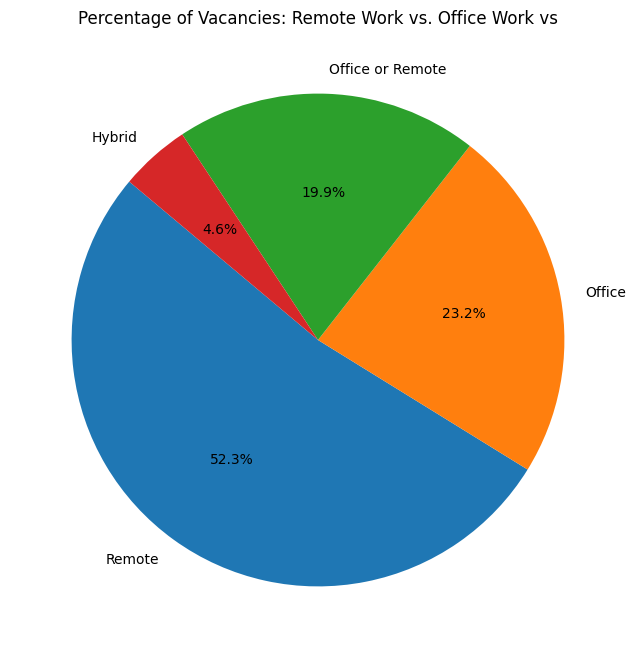

In [206]:
remote_vacancies = vacancies[vacancies["Additional Information"].str.contains('Remote', case=False)]
office_vacancies = vacancies[vacancies["Additional Information"].str.contains('Office', case=False)]
office_or_remote = vacancies[vacancies["Additional Information"].str.contains('Office or Remote', case=False)]
hybrid = vacancies[vacancies["Additional Information"].str.contains('Hybrid', case=False)]

counts = [
    remote_vacancies.shape[0],
    office_vacancies.shape[0],
    office_or_remote.shape[0],
    hybrid.shape[0]
]

labels = ['Remote', 'Office', 'Office or Remote', 'Hybrid']

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Vacancies: Remote Work vs. Office Work vs")
plt.show()


### In this analysis, we will examine the distribution of job vacancies for different position

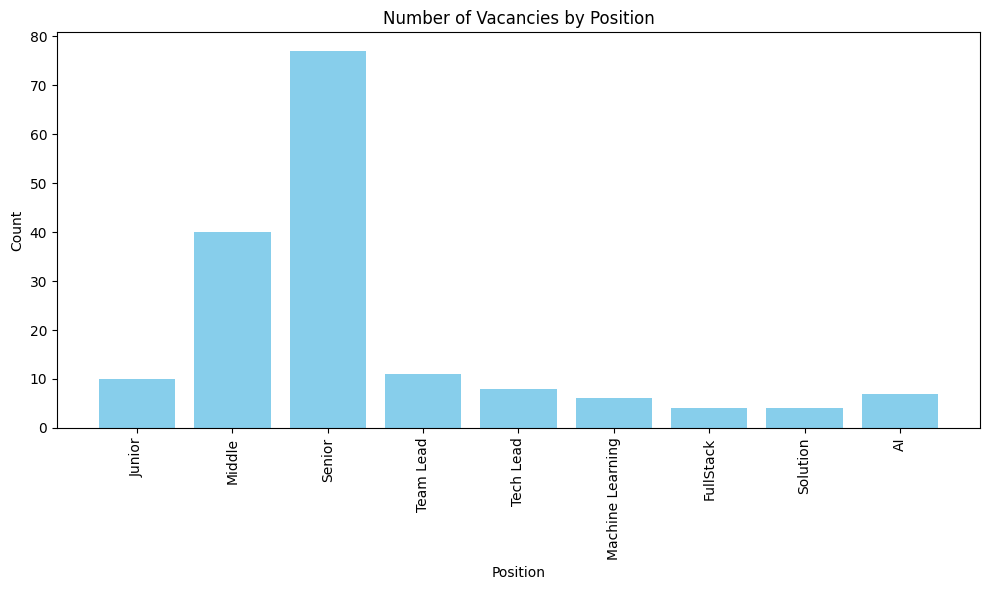

In [207]:
positions = ["Junior", "Middle", "Senior", "Team Lead", "Tech Lead", "Machine Learning", "FullStack", "Solution", "AI"]
position_counts = {position: 0 for position in positions}

for title in vacancies['Title']:
    for position in positions:
        if position in title:
            position_counts[position] += 1

position_df = pd.DataFrame.from_dict(position_counts, orient='index', columns=['Count'])

plt.figure(figsize=(10, 6))
plt.bar(position_df.index, position_df['Count'], color='skyblue')
plt.xticks(rotation='vertical')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Number of Vacancies by Position')
plt.tight_layout()